### Q. Predict canada's per capita income in year 2020. 

In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
from scipy import stats
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline 

In [359]:
df=pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [360]:
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [361]:
df.rename(columns={"per capita income (US$)":"income"},inplace=True)

In [362]:
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0.5, 1.0, 'per capita income (US$) in US by Year')

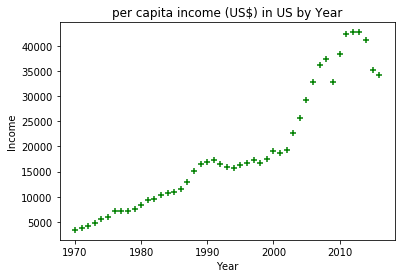

In [363]:
plt.scatter(df.year,df.income,color='green',marker="+")
plt.xlabel("Year")
plt.ylabel("Income")
plt.title("per capita income (US$) in US by Year")

## Boxcox Transformation

#### x = exp(log(alpha * transform + 1) / alpha)
#### where 'transform' is the transformed data.

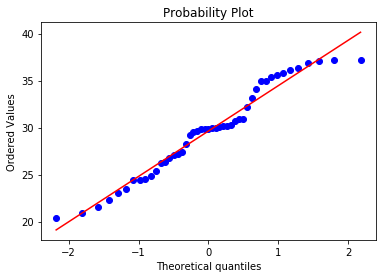

In [429]:
stats.probplot(boxcox(df.income,0.2), dist="norm", plot=pylab)
pylab.show()

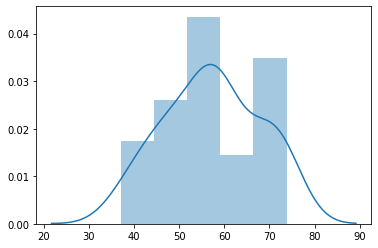

In [430]:
skewed_box_cox, lmda = stats.boxcox(inc)
sns.distplot(skewed_box_cox)

In [431]:
columns = ['BoxCoxIncome']
Lambda=0.2
inc=boxcox(df.income,Lambda)
Binc=pd.DataFrame(inc, columns=columns)
Binc.head()

,BoxCoxIncome
0,20.424234
1,20.953686
2,21.587152
3,22.245763
4,23.070010


In [432]:
df['Binc']=boxcox(df.income,0.2)
df.head()

,year,income,Binc
0,1970,3399.299037,20.424234
1,1971,3768.297935,20.953686
2,1972,4251.175484,21.587152
3,1973,4804.463248,22.245763
4,1974,5576.514583,23.070010


In [433]:
#income=df.drop('year',axis='columns')
#income=pd.DataFrame({"income" : income})
#income.info()

In [434]:
Binc.isnull().sum()
Binc.describe()

,BoxCoxIncome
count,47.000000
mean,29.626904
std,4.768508
min,20.424234
25%,26.243320
50%,29.840165
75%,33.598107
max,37.170398


In [435]:
#lnincome=np.sqrt(income)
lnincome.describe()
lnincome.head()
lnincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 1 columns):
income    47 non-null float64
dtypes: float64(1)
memory usage: 504.0 bytes


Text(0.5, 1.0, 'per capita income (US$) in US by Year')

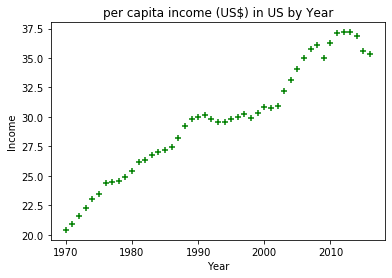

In [436]:
plt.scatter(df.year,df.Binc,color='green',marker="+")
plt.xlabel("Year")
plt.ylabel("Income")
plt.title("per capita income (US$) in US by Year")

In [437]:
model=linear_model.LinearRegression()
model.fit(df[['year']],df['Binc'])

LinearRegression()

In [438]:
model.coef_

array([0.34044581])

In [439]:
model.intercept_

-648.8816041323322

## prediction of house price in 2020

In [440]:
Pred=model.predict([[2020]])
Pred

array([38.81894051])

## Converting price from BoxCox transformation

In [441]:
Y=np.exp(np.log(Lambda*Pred+1)/Lambda)

In [442]:
Y

array([51696.2857797])

# Predicted Price of House in 2020 in Canada is $51696.29